In [ ]:
!pip install opendatasets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install opencv-contrib-python
!ssize.empty()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [ ]:
import os
import opendatasets as od
od.download("https://www.kaggle.com/competitions/tensorflow-speech-recognition-challenge/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abdullah182
Your Kaggle Key: ··········


ApiException: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import opendatasets as od
od.download("https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abdullah182
Your Kaggle Key: ··········


100%|██████████| 84.0M/84.0M [00:00<00:00, 152MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import os
import cv2
import tensorflow as tf
import keras
import glob as gb
from PIL import Image, ImageEnhance
import random
from sklearn.utils import shuffle


In [ ]:
train_path = ("/content/brain-tumor-mri-dataset/Training")
print(os.listdir("/content/brain-tumor-mri-dataset"))

print(os.listdir("/content/brain-tumor-mri-dataset/Training"))



['Training', 'Testing']
['notumor', 'meningioma', 'pituitary', 'glioma']


In [ ]:
test_path = ("/content/brain-tumor-mri-dataset/Testing")


print(os.listdir("/content/brain-tumor-mri-dataset/Testing"))
print(' /content/brain-tumor-mri-dataset/Testing ')

['notumor', 'meningioma', 'pituitary', 'glioma']
 /content/brain-tumor-mri-dataset/Testing 


In [ ]:
pred_path =("/content/brain-tumor-detection/Br35H-Mask-RCNN/VAL")
print(os.listdir("/content/brain-tumor-detection/Br35H-Mask-RCNN/VAL"))


['y617.jpg', 'y518.jpg', 'y634.jpg', 'y587.jpg', 'y675.jpg', 'y647.jpg', 'y680.jpg', 'y503.jpg', 'y550.jpg', 'y557.jpg', 'y531.jpg', 'y691.jpg', 'y607.jpg', 'y524.jpg', 'y578.jpg', 'y625.jpg', 'y669.jpg', 'y633.jpg', 'y655.jpg', 'y548.jpg', 'y692.jpg', 'y614.jpg', 'y683.jpg', 'y682.jpg', 'y688.jpg', 'y542.jpg', 'y645.jpg', 'y582.jpg', 'y696.jpg', 'y612.jpg', 'y579.jpg', 'y676.jpg', 'y549.jpg', 'y572.jpg', 'y589.jpg', 'y650.jpg', 'y601.jpg', 'y515.jpg', 'y529.jpg', 'y665.jpg', 'y639.jpg', 'y600.jpg', 'y521.jpg', 'y520.jpg', 'y689.jpg', 'y602.jpg', 'y608.jpg', 'y584.jpg', 'y624.jpg', 'y581.jpg', 'y583.jpg', 'y638.jpg', 'y547.jpg', 'y537.jpg', 'y559.jpg', 'y553.jpg', 'y653.jpg', 'y552.jpg', 'y519.jpg', 'y661.jpg', 'y532.jpg', 'y514.jpg', 'y684.jpg', 'y544.jpg', 'y694.jpg', 'y501.jpg', 'y541.jpg', 'y657.jpg', 'y528.jpg', 'y654.jpg', 'y627.jpg', 'y699.jpg', 'y592.jpg', 'y523.jpg', 'y512.jpg', 'y635.jpg', 'y595.jpg', 'y585.jpg', 'y575.jpg', 'y517.jpg', 'y551.jpg', 'y641.jpg', 'y622.jpg', 'y6

In [ ]:
for labels in  os.listdir(train_path) : 
    files = gb.glob(pathname= str( train_path +'//' + labels + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {labels}')
    
   

For training data , found 1595 in folder notumor
For training data , found 1339 in folder meningioma
For training data , found 1457 in folder pituitary
For training data , found 1321 in folder glioma


In [ ]:
for labels in  os.listdir(test_path) : 
    files = gb.glob(pathname= str( test_path +'//' + labels + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {labels}')

In [ ]:
files = gb.glob(pathname= str(pred_path+ '//'+'/*.jpg'))
print(f'For Prediction data , found {len(files)}')


For Prediction data , found 201


In [ ]:
code = {'glioma':0 ,'pituitary':1,'meningioma':2,'notumor':3}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

     

In [ ]:
size = []
for labels in  os.listdir(train_path) : 
    files = gb.glob(pathname= str( train_path +'//' + labels + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(512, 512)       2433
(512, 512, 3)    1522
(225, 225, 3)     267
(630, 630, 3)      64
(236, 236, 3)      53
                 ... 
(260, 314, 3)       1
(240, 236, 3)       1
(674, 648, 3)       1
(228, 228, 3)       1
(903, 721, 3)       1
Length: 395, dtype: int64

In [ ]:
size = []
for labels in  os.listdir(test_path) : 
    files = gb.glob(pathname= str( test_path +'//' + labels + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(512, 512)       616
(512, 512, 3)    171
(225, 225, 3)     64
(236, 236, 3)     28
(222, 227, 3)     17
                ... 
(309, 236, 3)      1
(268, 236, 3)      1
(208, 233, 3)      1
(280, 236, 3)      1
(257, 221, 3)      1
Length: 198, dtype: int64

In [ ]:
size = []
files = gb.glob(pathname= str(pred_path + 'pred/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()


<ipython-input-43-b3a3bed572b3>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series(size).value_counts()


Series([], dtype: int64)

In [ ]:
s=100
X_train = []
y_train = []
for labels in  os.listdir(train_path) : 
    files = gb.glob(pathname= str( train_path +'//' + labels + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))  
        y_train.append(code[labels])

print(f'we have {len(X_train)} items in X_train')

we have 5712 items in X_train


In [ ]:

X_test = []
y_test = []
for folder in  os.listdir(test_path ) : 
    files = gb.glob(pathname= str(test_path +'//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])
print(f'we have {len(X_test)} items in X_test')        

we have 1311 items in X_test


In [ ]:
X_pred = []
files = gb.glob(pathname= str(pred_path + '/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_pred.append(list(image_array))     
print(f'we have {len(X_pred)} items in X_test')     

we have 201 items in X_test


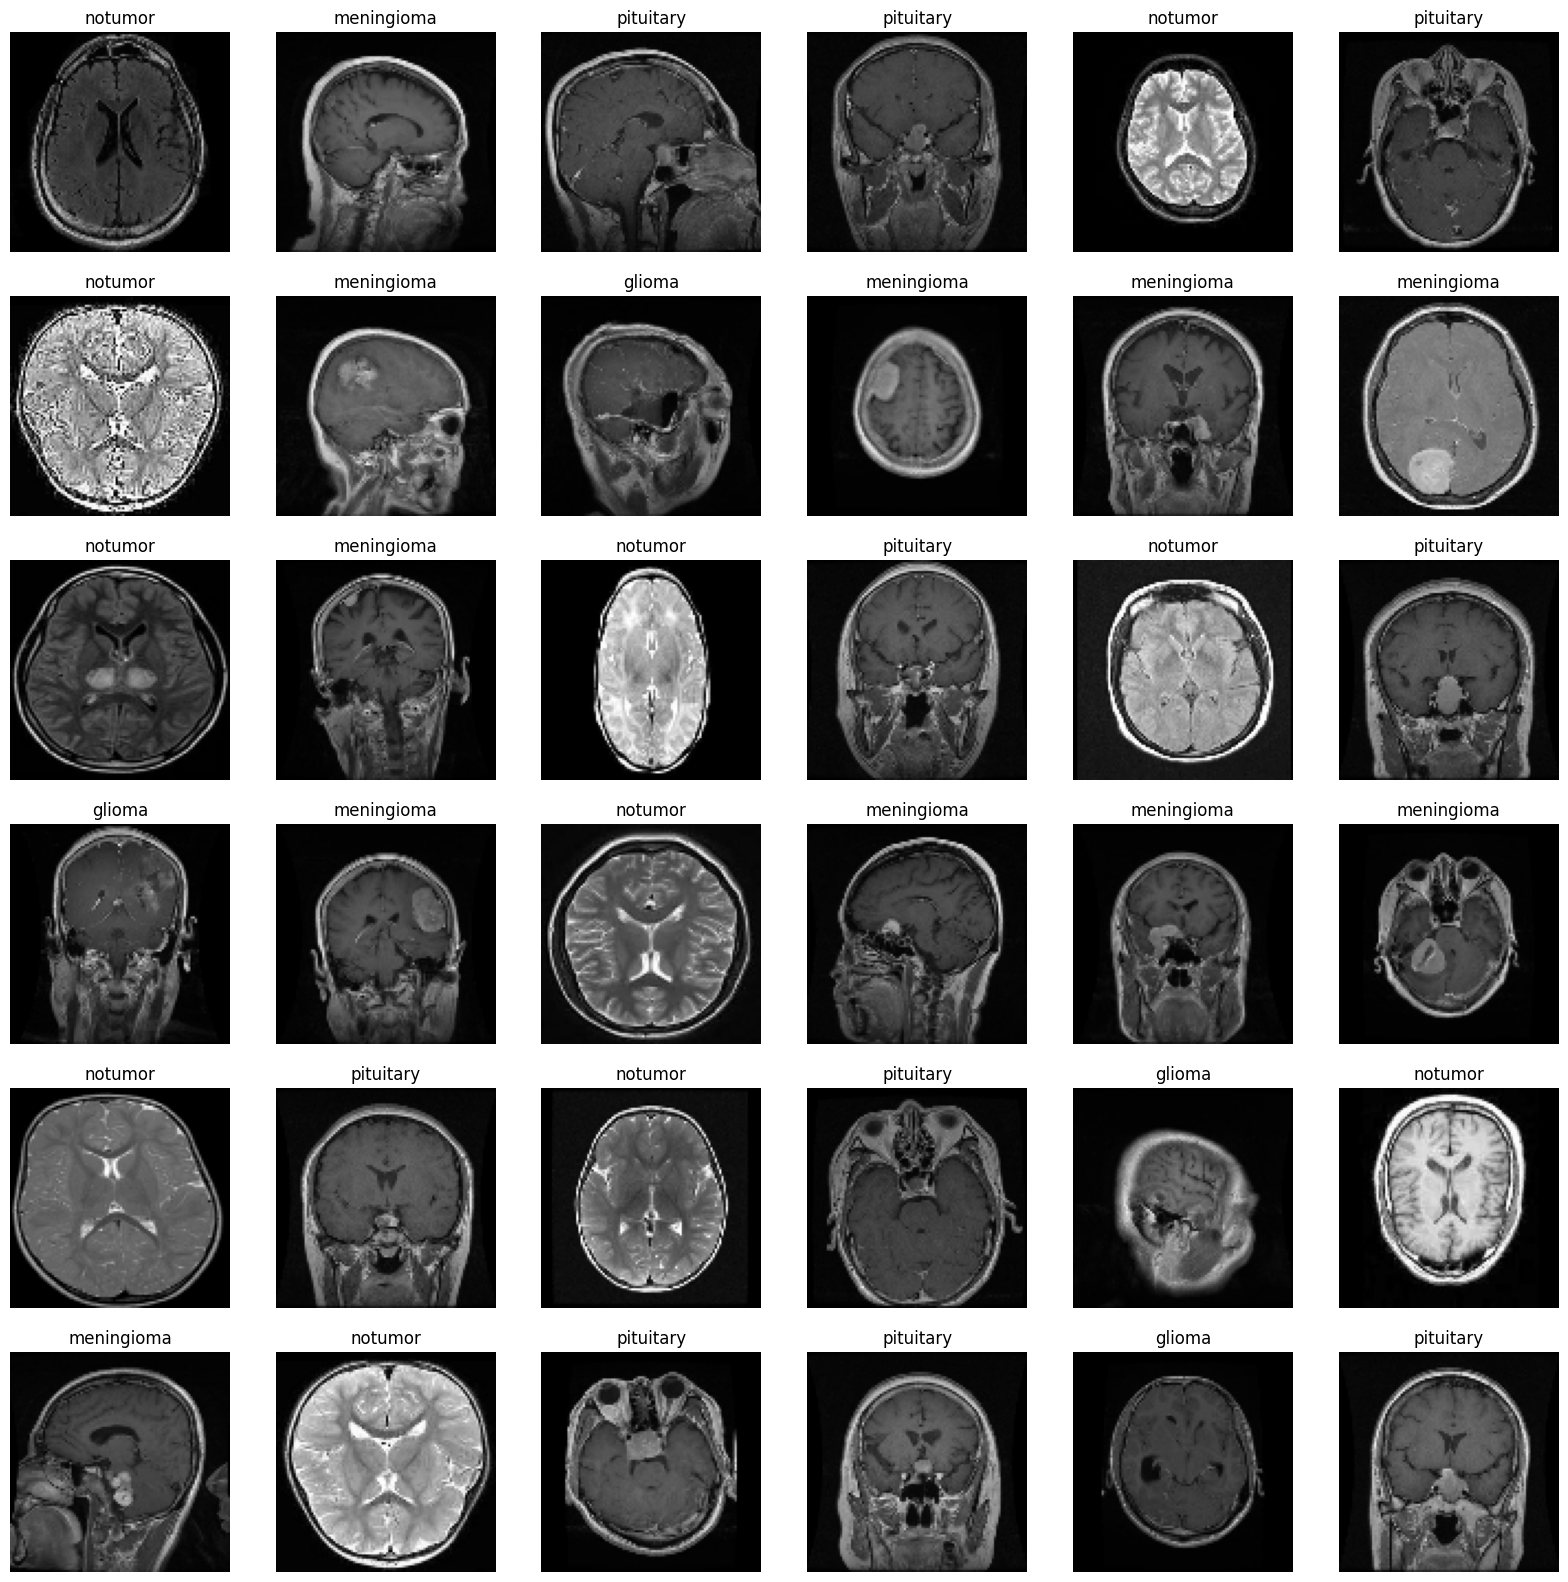

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

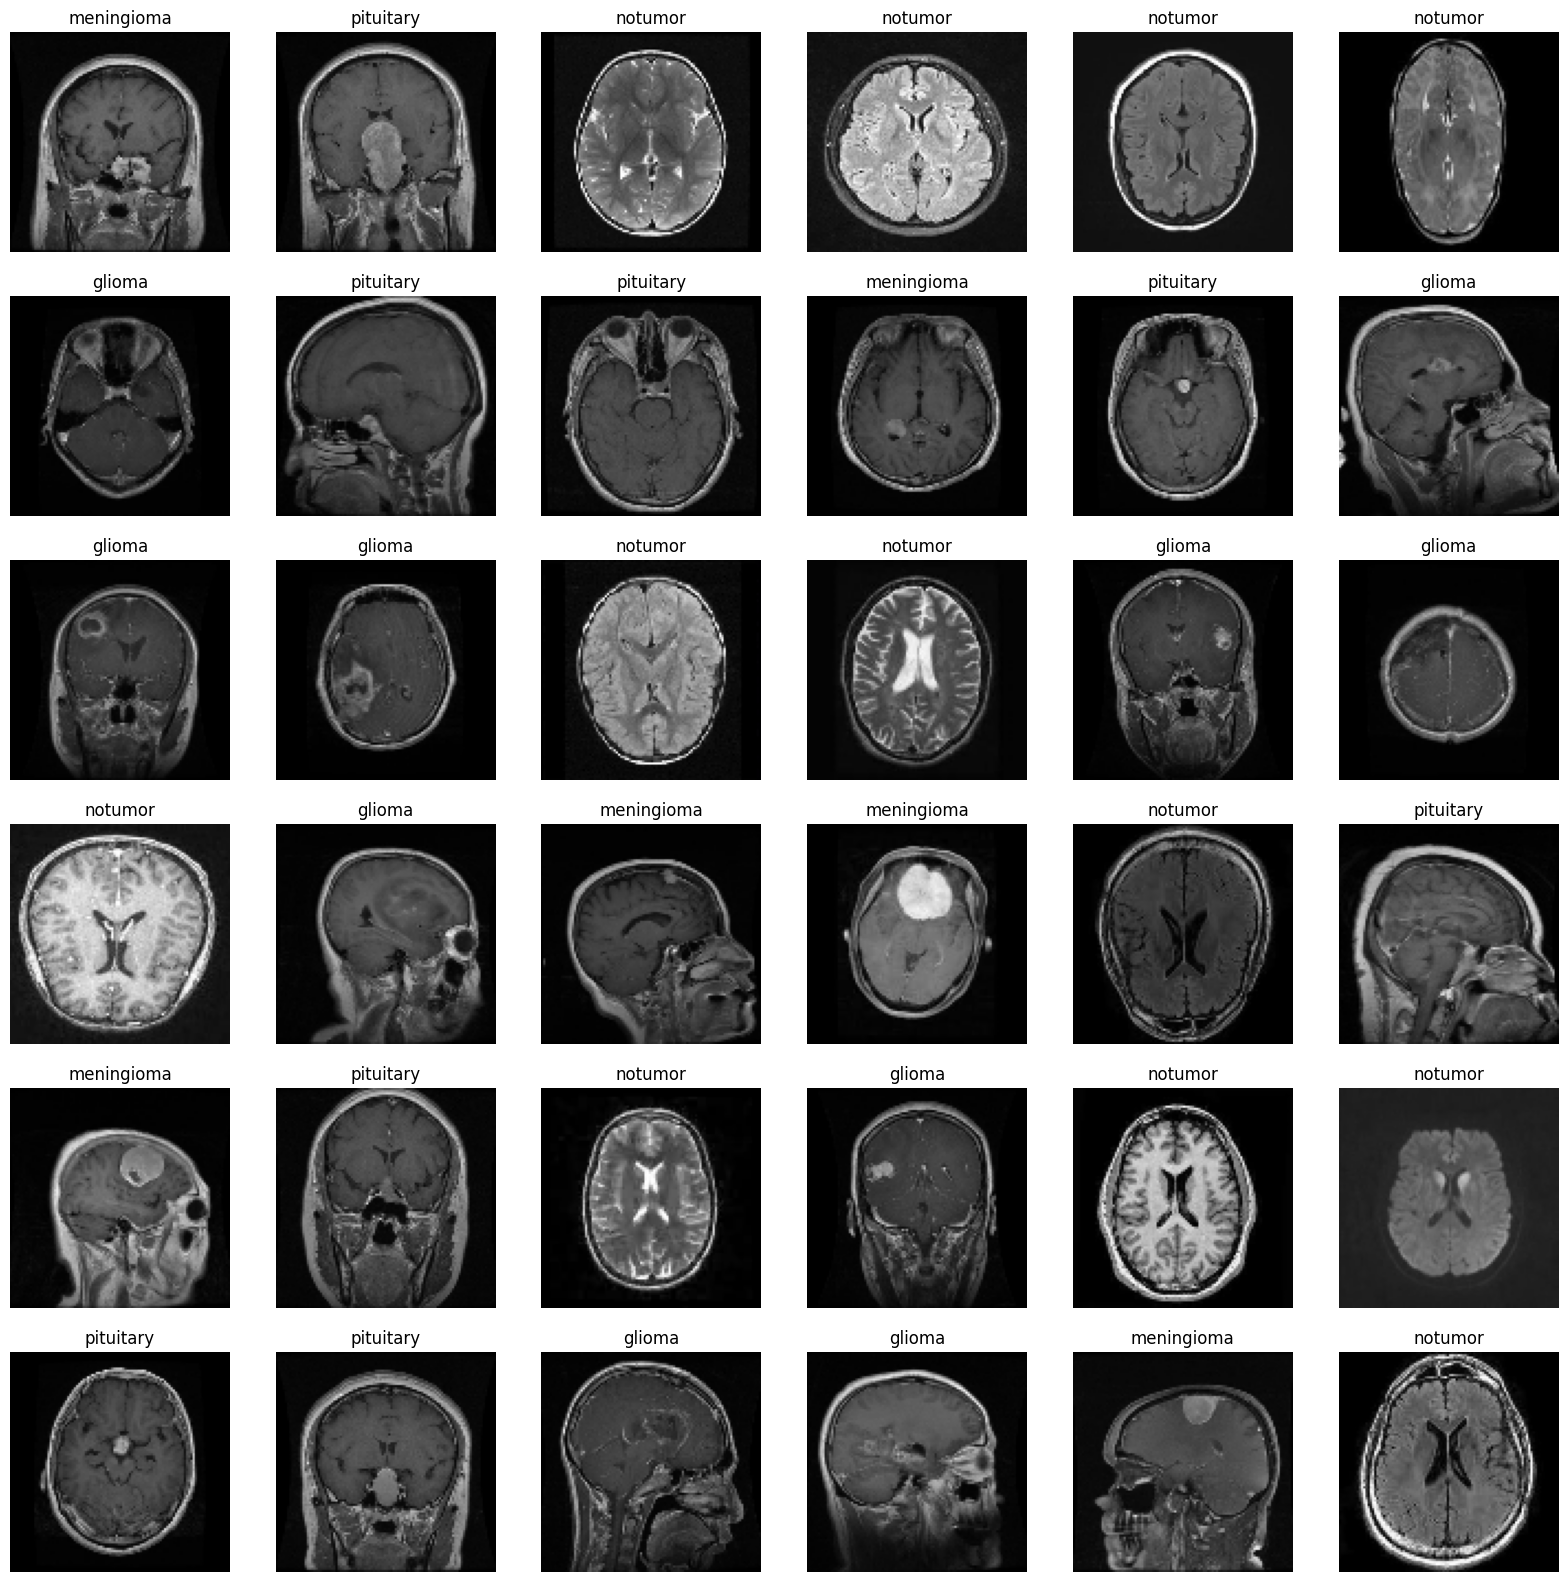

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])   
    plt.axis('off')
    plt.title(getcode(y_test[i]))

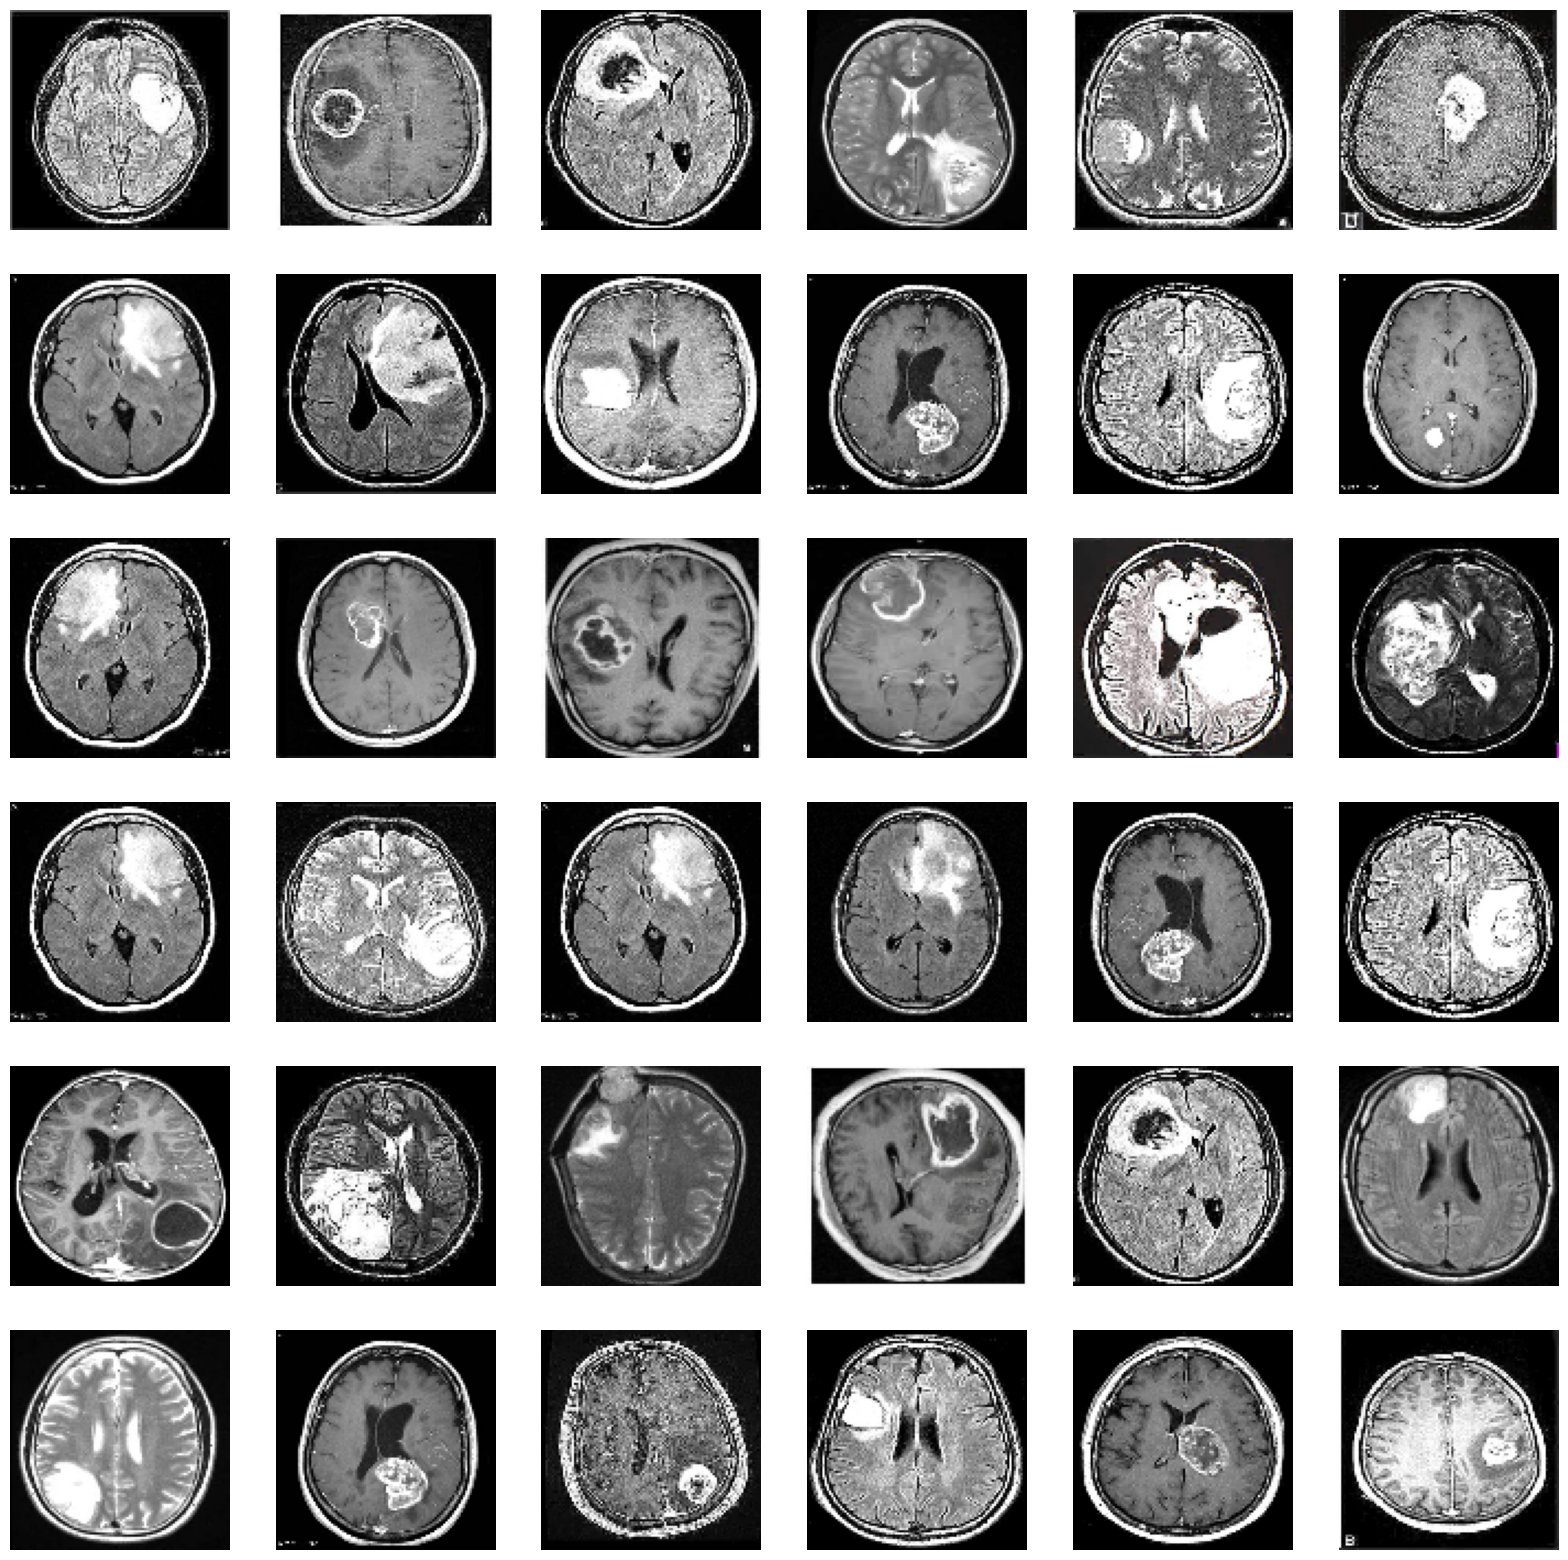

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

In [ ]:
print(f'we have {len(X_train)} items in X_train')


we have 5712 items in X_train


In [ ]:
#model 

X_train = np.array(X_train)
y_train = np.array(y_train)


print(f'X_train shape  is {X_train.shape}')

print(f'y_train shape  is {y_train.shape}')


X_train shape  is (5712, 100, 100, 3)
y_train shape  is (5712,)


In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (5712, 100, 100, 3)
X_test shape  is (1311, 100, 100, 3)
X_pred shape  is (201, 100, 100, 3)
y_train shape  is (5712,)
y_test shape  is (1311,)


In [ ]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(6,activation='softmax') ,    
        ])

In [ ]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 150)       270150    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 150)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 120)       162120    
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 80)        86480     
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 50)        36050     
                                   

In [ ]:
epochs = 30
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1)


Epoch 1/30
 2/90 [..............................] - ETA: 33:30 - loss: 6.1311 - accuracy: 0.1953

KeyboardInterrupt: ignored

In [ ]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

In [ ]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))

In [ ]:
y_result = KerasModel.predict(X_pred_array)

print('Prediction Shape is {}'.format(y_result.shape))

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))